# Algorytmy geometryczne - ćwiczenie 1

Ćwiczenie wprowadzające w zagadnienia geometrii obliczeniowej – implementacja podstawowych
predykatów geometrycznych, przeprowadzenie testów, wizualizacja i opracowanie wyników. Porównanie wyników klasyfikacji położenia punktów na płaszczyźnie względem prostej dla różnych metod wykorzystujących wyznacznik.

### 1. Przygotowanie i wizualizacja zbiorów danych

In [1]:
from random import uniform, random, seed
from math import pi, sin, cos
from geometria import *

#### A: 10^5 losowych punktów o współrzędnych z przedziału [-1000, 1000)

<IPython.core.display.Javascript object>


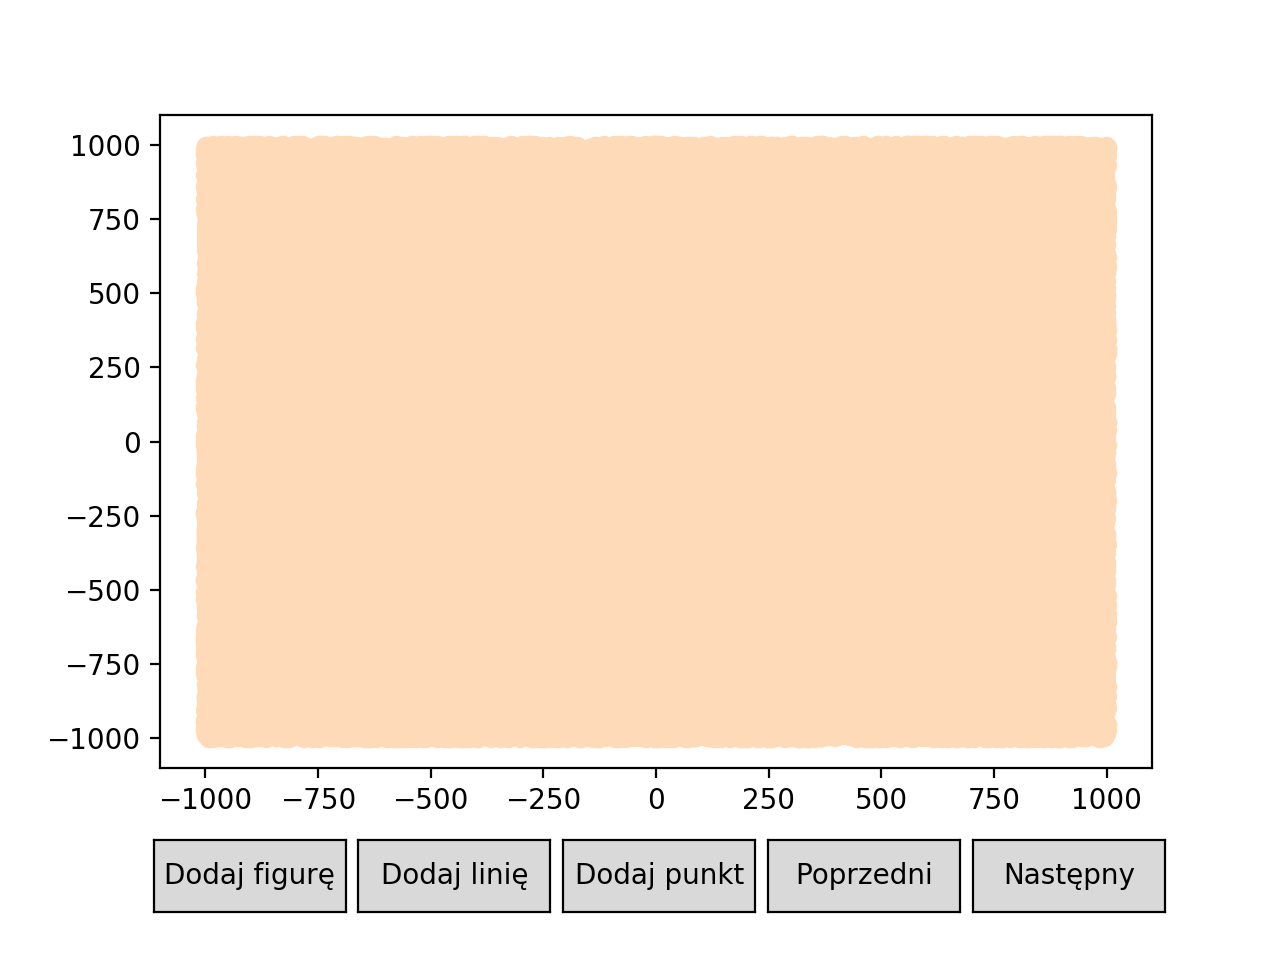

In [2]:
%matplotlib notebook
seed(144)
points_A = [(uniform(-1000, 1000), uniform(-1000, 1000)) for _ in range(10**5)]
Plot(points = [PointsCollection(points_A, color='peachpuff')]).draw()

#### B: 10^5 losowych punktów o współrzędnych z przedziału [-10^14, 10^14]

<IPython.core.display.Javascript object>


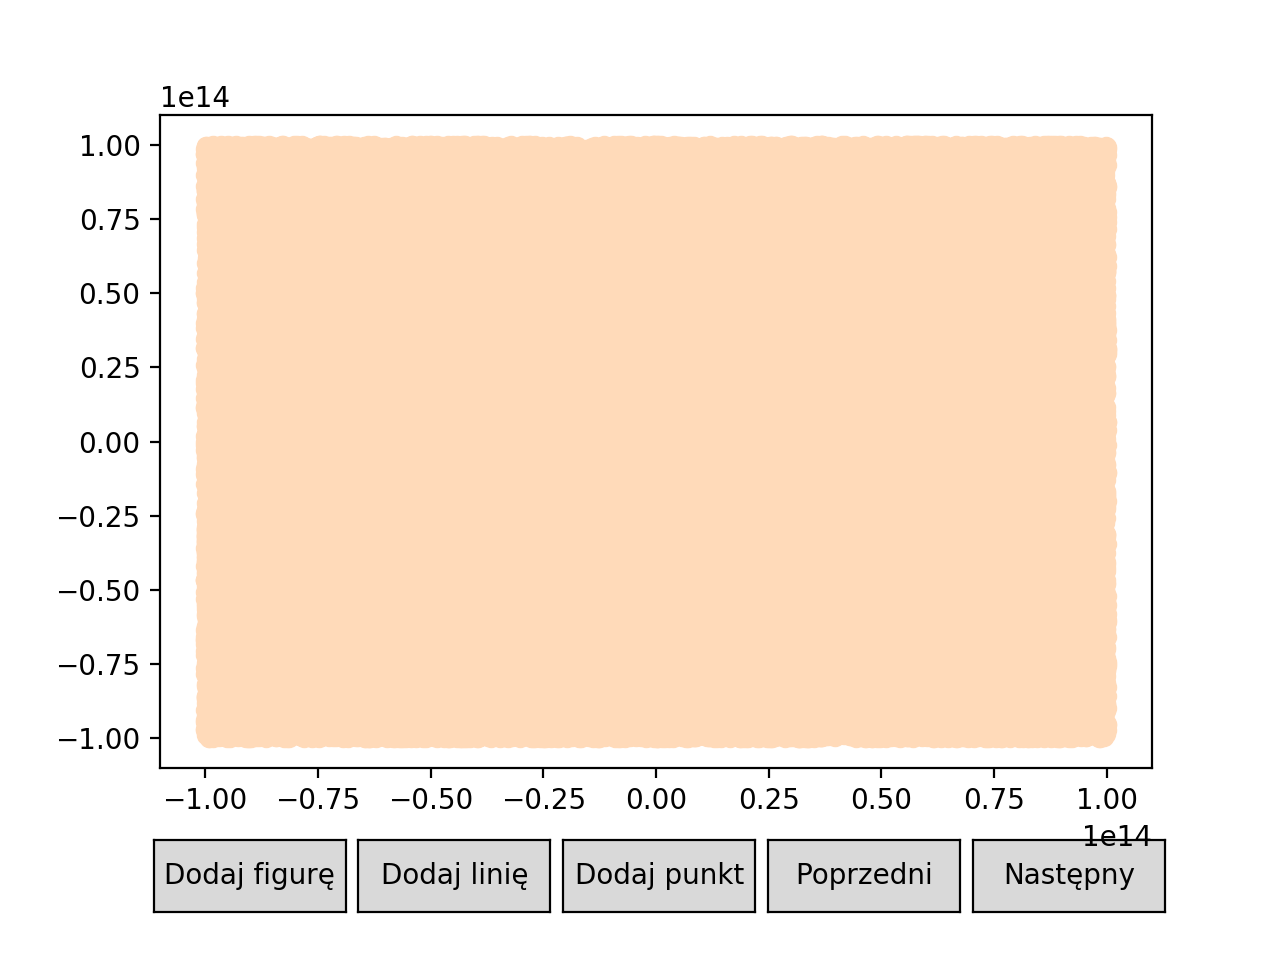

In [3]:
seed(144)
points_B = [(uniform(-10**14, 10**14), uniform(-10**14, 10**14)) for _ in range(10**5)]
Plot(points = [PointsCollection(points_B, color='peachpuff')]).draw()

#### C: 1000 losowych punktów leżących na okręgu o środku (0,0) i promieniu R=100

Wykorzystuję postać okręgu w postaci parametrycznej, z wykorzystaniem funkcji trygonometrycznych, aby otrzymać punkty mniej więcej równomiernie rozłożone na okręgu.

<IPython.core.display.Javascript object>


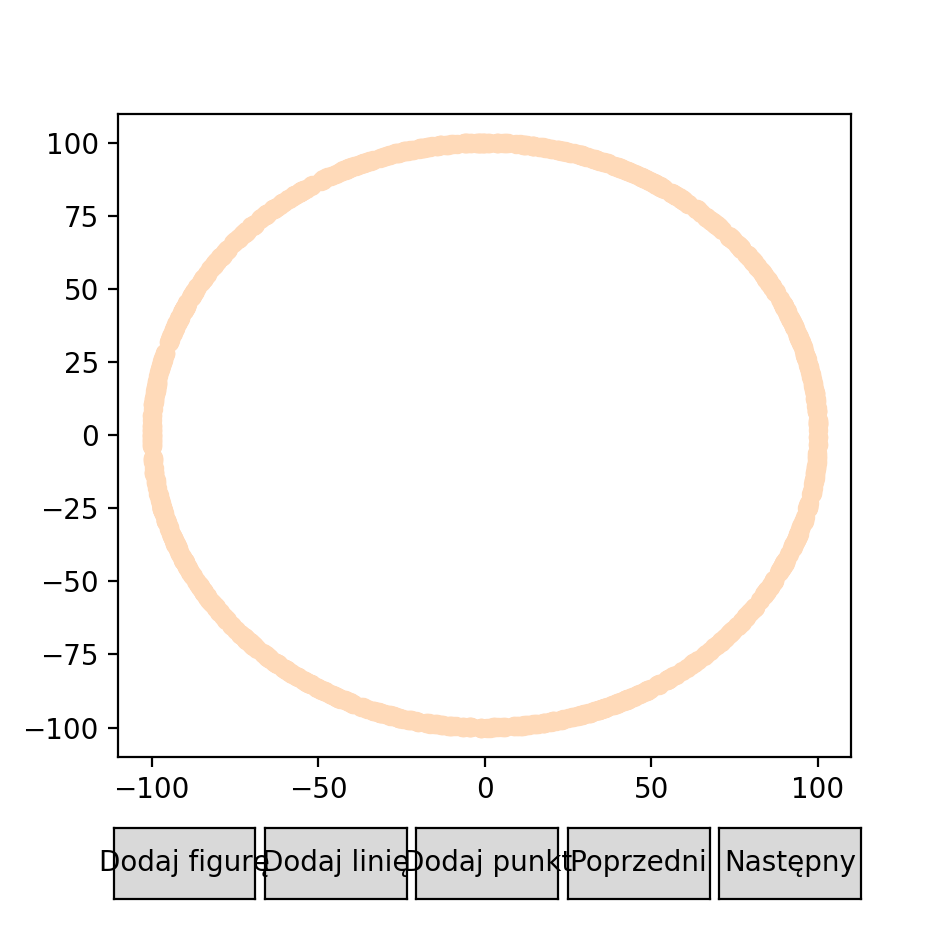

In [5]:
seed(144)
points_C = [(100*cos(2*pi*t), 100*sin(2*pi*t)) for t in [random() for _ in range(1000)]]
Plot(points = [PointsCollection(points_C, color='peachpuff')]).draw()

#### D: 1000 losowych punktów o współrzędnych z przedziału [-1000, 1000] leżących na prostej wyznaczonej przez wektor (a, b), <br> a = [-1.0, 0.0], b = [1.0, 0.1]

a = [-1, 0]
b = [1, 0.1]
wektor ab = [2, 0.1]
x = -1 + 2t
y = 0.1t

dla x = -1000 => t = -999/2
dla x = 1000 => t = 1001/2

t niech będzie z przedziału [-499, 500]


<IPython.core.display.Javascript object>


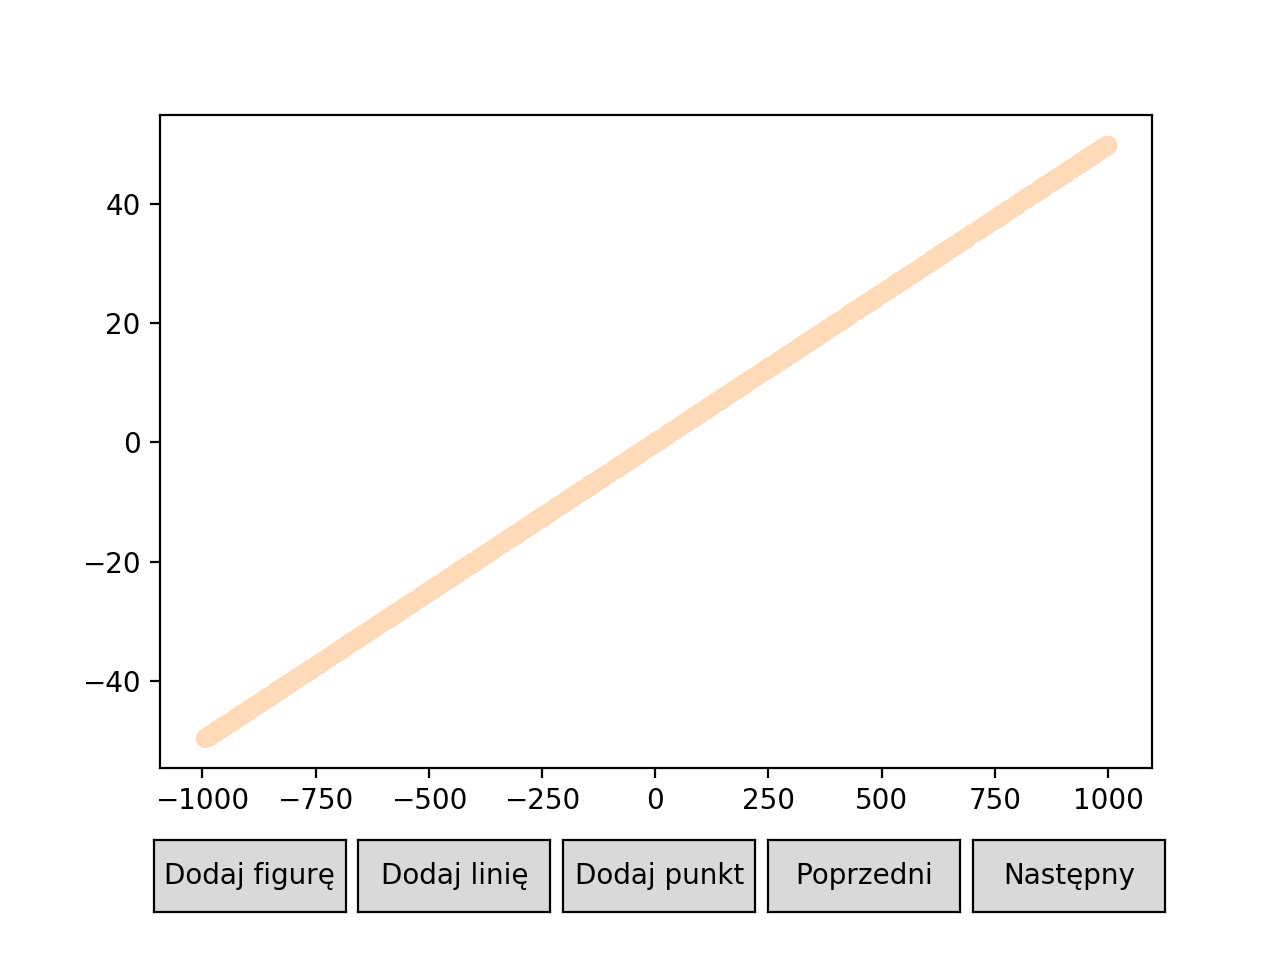

In [6]:
seed(144)
points_D = [(-1 + 2*t, 0.1*t) for t in [uniform(-499, 500) for _ in range(1000)]]
Plot(points = [PointsCollection(points_D, color='peachpuff')]).draw()

### Implementacja funkcji obliczających wyznacznik

In [7]:
# własne funkcje

def det_3x3(a, b, c): #wyznacznik 3x3 metodą Sarrusa
    return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - b[1]*c[0] - b[0]*a[1] - c[1]*a[0]

def det_2x2(a, b, c): #2x2 metodą "na krzyż"
    return (a[0]-c[0])*(b[1]-c[1]) - (b[0]-c[0])*(a[1]-c[1])

# z wykorzystaniem biblioteki numpy

def det_np_3x3(a, b, c):
    matrix = np.array([[a[0], a[1], 1], [b[0], b[1], 1], [c[0],c[1],1]])
    return np.linalg.det(matrix)

def det_np_2x2(a, b, c):
    matrix = np.array([[a[0]-c[0], a[1]-c[1]], [b[0]-c[0], b[1]-c[1]]])
    return np.linalg.det(matrix)

### Funkcja dzieląca punkty ze względu na położenie względem prostej ab

In [8]:
# stałe do tablicy przyporządkowań
CCW = 1
CW = -1
COLL = 0

In [9]:
def classify_points(points, epsilon, det_func, a=(-1, 0), b=(1, 0.1)):
    ccw = [] # przeciwnie do ruchu wskazówek zegara
    cw = [] # zgodnie z ruchem wskazówek zegara
    coll = [] # współliniowe
    
    category = [None for _ in range(len(points))] 
    ## category[i] -> do jakiej kategorii został przyporządkowany punkt pod indeksem i
    
    for i in range(len(points)):
        det = det_func(a, b, points[i])
        if det > epsilon:
            ccw.append(points[i])
            category[i] = CCW
        elif det < -epsilon:
            cw.append(points[i])
            category[i] = CW
        else:
            coll.append(points[i])
            category[i] = COLL
    
    return ccw, cw, coll, category

In [10]:
DET = 0
EPSILON = 1
POINTS = 2

def draw_scenes(variable, values, epsilon=None, det=None, points=None, a = (-1, 0), b = (1, 0.1)):
    '''
    zwraca wykres składający się z kilku scen dla zmieniających się parametrów
    variable: DET -> zmieniająca się metoda obliczania wyznacznika
              EPSILON -> zmienna tolerancja względem zera
              POINTS -> zmienne dane wejściowe (różne zestawy punktów)
    values: tablica różnych wartości dla których porównujemy
    
        przykładowe wywołanie:
        draw_scenes(EPSILON, [1e-8, 1e-10], det=det_3x3, points=points_C)
        zwróci instancję klasy Plot zawierającą wykres złożony z 2 scen,
        obie sceny używają funkcji do wyznacznika 3x3
        rozpatrują punkty z zestawu danych C
        pierwsza scena jest dla epsilona 1e-8, a druga dla epsilona 1e-10
        
    '''
    scenes = []
    if variable == DET:
        for det in values:
            ccw, cw, coll, _ = classify_points(points=points, epsilon=epsilon, det_func=det, a=a, b=b)
            scenes.append(Scene([PointsCollection(ccw, color='lightskyblue'),
                        PointsCollection(cw, color='palegreen'),
                        PointsCollection(coll, color='plum')]))
    elif variable == EPSILON:
        for epsilon in values:
            ccw, cw, coll, _ = classify_points(points=points, epsilon=epsilon, det_func=det, a=a, b=b)
            scenes.append(Scene([PointsCollection(ccw, color='lightskyblue', name=str(epsilon)),
                        PointsCollection(cw, color='palegreen'),
                        PointsCollection(coll, color='plum')]))
    elif variable == POINTS:
        for points in values:
            ccw, cw, coll, _ = classify_points(points=points, epsilon=epsilon, det_func=det, a=a, b=b)
            scenes.append(Scene([PointsCollection(ccw, color='lightskyblue'),
                        PointsCollection(cw, color='palegreen'),
                        PointsCollection(coll, color='plum')]))
    
    return Plot(scenes=scenes)

def calc_scenes(variable, values, epsilon=None, det=None, points=None, a=(-1, 0), b=(1, 0.1)):
    '''
    wypisuje ile punktów zostało przyporządkowanych do poszczególnych kategorii
    przy zmieniającyh się parametrach (tak jak w funkcji draw scenes)
    pierwsza wartość to liczba punktów na lewo od prostej (counter clockwise)
    druga wartość to liczba punktów na prawo od prostej (clockwise)
    trzecia wartość to liczba punktów współliniowych (collinear)
    '''
    
    if variable == DET:
        for det in values:
            ccw, cw, coll, _ = classify_points(points=points, epsilon=epsilon, det_func=det, a=a, b=b)
            print(len(ccw), len(cw), len(coll))
            
    elif variable == EPSILON:
        for epsilon in values:
            ccw, cw, coll, _ = classify_points(points=points, epsilon=epsilon, det_func=det, a=a, b=b)
            print(len(ccw), len(cw), len(coll))
            
    elif variable == POINTS:
        for points in values:
            ccw, cw, coll, _ = classify_points(points=points, epsilon=epsilon, det_func=det, a=a, b=b)
            print(len(ccw), len(cw), len(coll))

### Wyznaczenie ile punktów zostało zakwalifikowanych do poszczególnych kategorii dla różnych epsilonów i funkcji wyznacznika

#### A

In [11]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_3x3, points=points_A)

49880 50120 0
49880 50120 0
49880 50120 0
49880 50120 0
49880 50120 0


In [12]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_2x2, points=points_A)

49880 50120 0
49880 50120 0
49880 50120 0
49880 50120 0
49880 50120 0


In [13]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_np_3x3, points=points_A)

49880 50120 0
49880 50120 0
49880 50120 0
49880 50120 0
49880 50120 0


In [14]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_np_2x2, points=points_A)

49880 50120 0
49880 50120 0
49880 50120 0
49880 50120 0
49880 50120 0


#### B

In [15]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_3x3, points=points_B)

49886 50114 0
49886 50114 0
49886 50114 0
49886 50114 0
49886 50114 0


In [16]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_2x2, points=points_B)

49879 50113 8
49879 50113 8
49879 50113 8
49879 50113 8
49879 50113 8


In [17]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_np_3x3, points=points_B)

49886 50114 0
49886 50114 0
49886 50114 0
49886 50114 0
49886 50114 0


In [18]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_np_2x2, points=points_B)

49884 50116 0
49884 50116 0
49884 50116 0
49884 50116 0
49884 50116 0


#### C

In [19]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_3x3, points=points_C)

518 482 0
518 482 0
518 482 0
518 482 0
518 482 0


In [20]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_2x2, points=points_C)

518 482 0
518 482 0
518 482 0
518 482 0
518 482 0


In [21]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_np_3x3, points=points_C)

518 482 0
518 482 0
518 482 0
518 482 0
518 482 0


In [22]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_np_2x2, points=points_C)

518 482 0
518 482 0
518 482 0
518 482 0
518 482 0


#### D

In [23]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_3x3, points=points_D)

255 382 363
250 379 371
0 0 1000
0 0 1000
0 0 1000


In [24]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_2x2, points=points_D)

136 154 710
134 153 713
129 149 722
73 84 843
0 0 1000


In [25]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_np_3x3, points=points_D)

468 530 2
451 509 40
32 28 940
0 0 1000
0 0 1000


In [26]:
calc_scenes(EPSILON, [0, 1e-16, 1e-14, 1e-12, 1e-10], det=det_np_2x2, points=points_D)

514 486 0
508 479 13
468 445 87
148 120 732
0 0 1000


### Wizualizacja klasyfikacji na wykresie za pomocą kolorów

legenda:
* <b><font color='lightskyblue'>lightskyblue</font></b>: przeciwnie do ruchu wskazówek zegara -> "po lewej"
* <b><font color='palegreen'>palegreen</font></b>: zgodnie z ruchem wskazówek zegara -> "po prawej"
* <b><font color='plum' font-weight=3m>plum</font></b>: współliniowe

#### podział punktów dla tolerancji równej 1e-14 z wykorzystaniem funkcji det_3x3

<IPython.core.display.Javascript object>


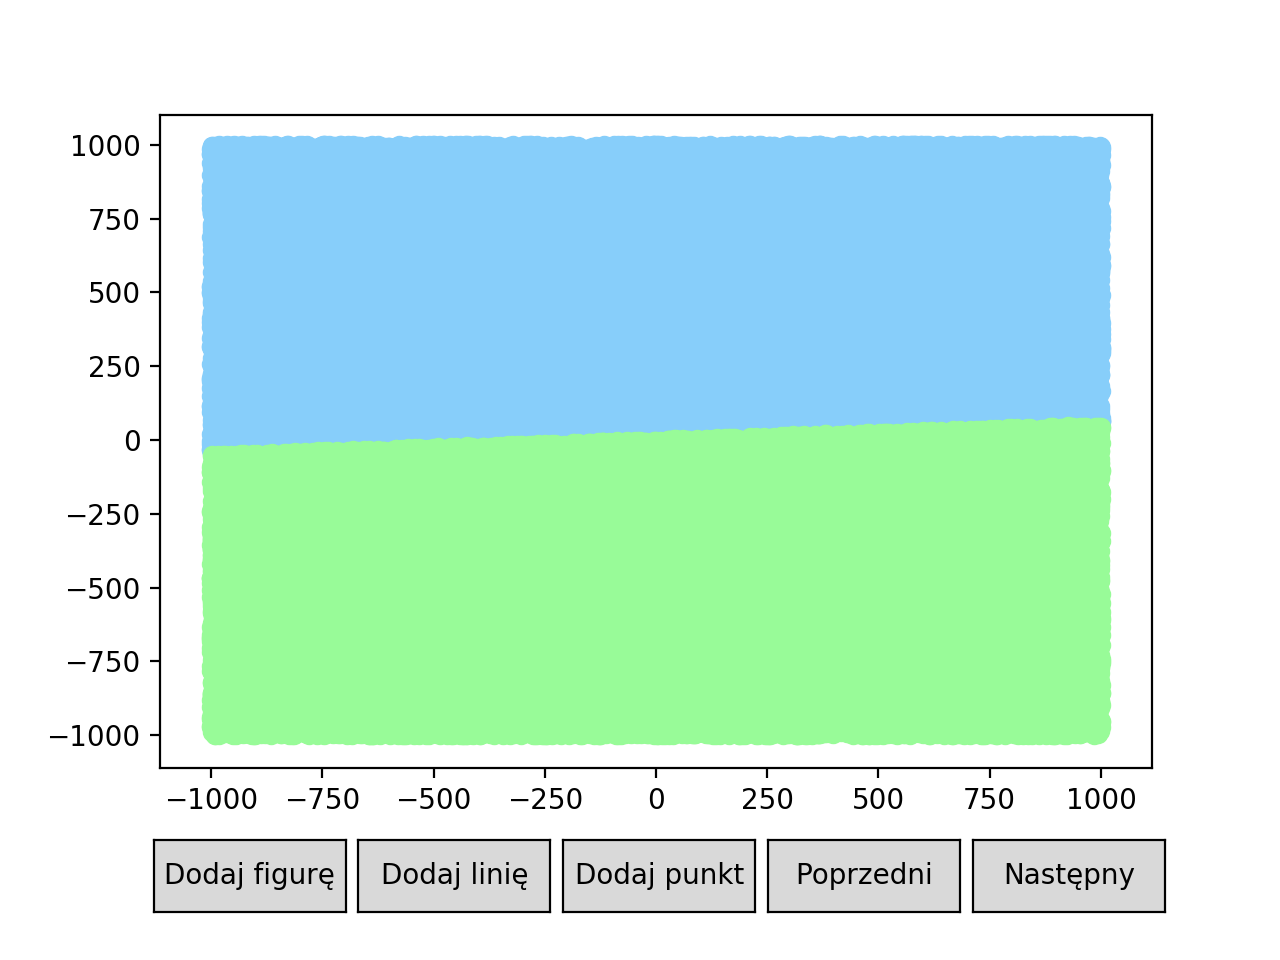

In [28]:
plot = draw_scenes(POINTS, [points_A, points_B, points_C, points_D], epsilon=1e-14, det=det_3x3)
plot.draw()

#### podział punktów dla tolerancji równej 1e-14 z wykorzystaniem funkcji det_3x3

<IPython.core.display.Javascript object>


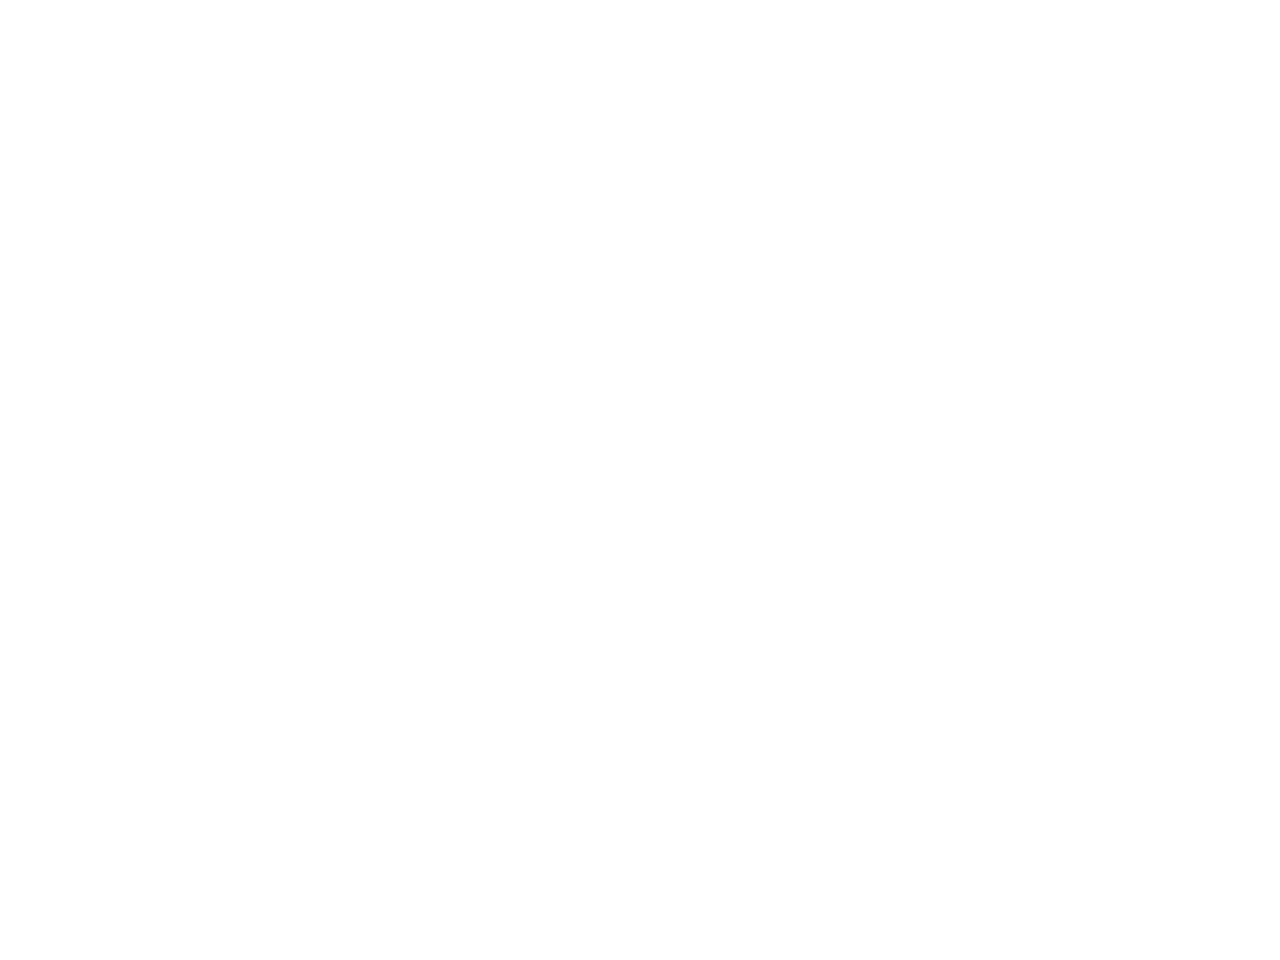

In [27]:
plot = draw_scenes(POINTS, [points_A, points_B, points_C, points_D], epsilon=1e-14, det=det_2x2)
plot.draw()

### Wizualizacja punktów różniących się klasyfikacją

In [28]:
def draw_differences(points, epsilon, det1, det2):

    ccw_1, cw_1, coll_1, classification_1 = classify_points(points, epsilon, det1)
    ccw_2, cw_2, coll_2, classification_2 = classify_points(points, epsilon, det2)
    
    differences = []
    
    for i in range(len(points)):
        if classification_1[i] != classification_2[i]:
                   differences.append(points[i])
        
    return Plot(points=[PointsCollection(differences, color='salmon')])

#### det_3x3 vs det_2x2 dla punktów B

<IPython.core.display.Javascript object>


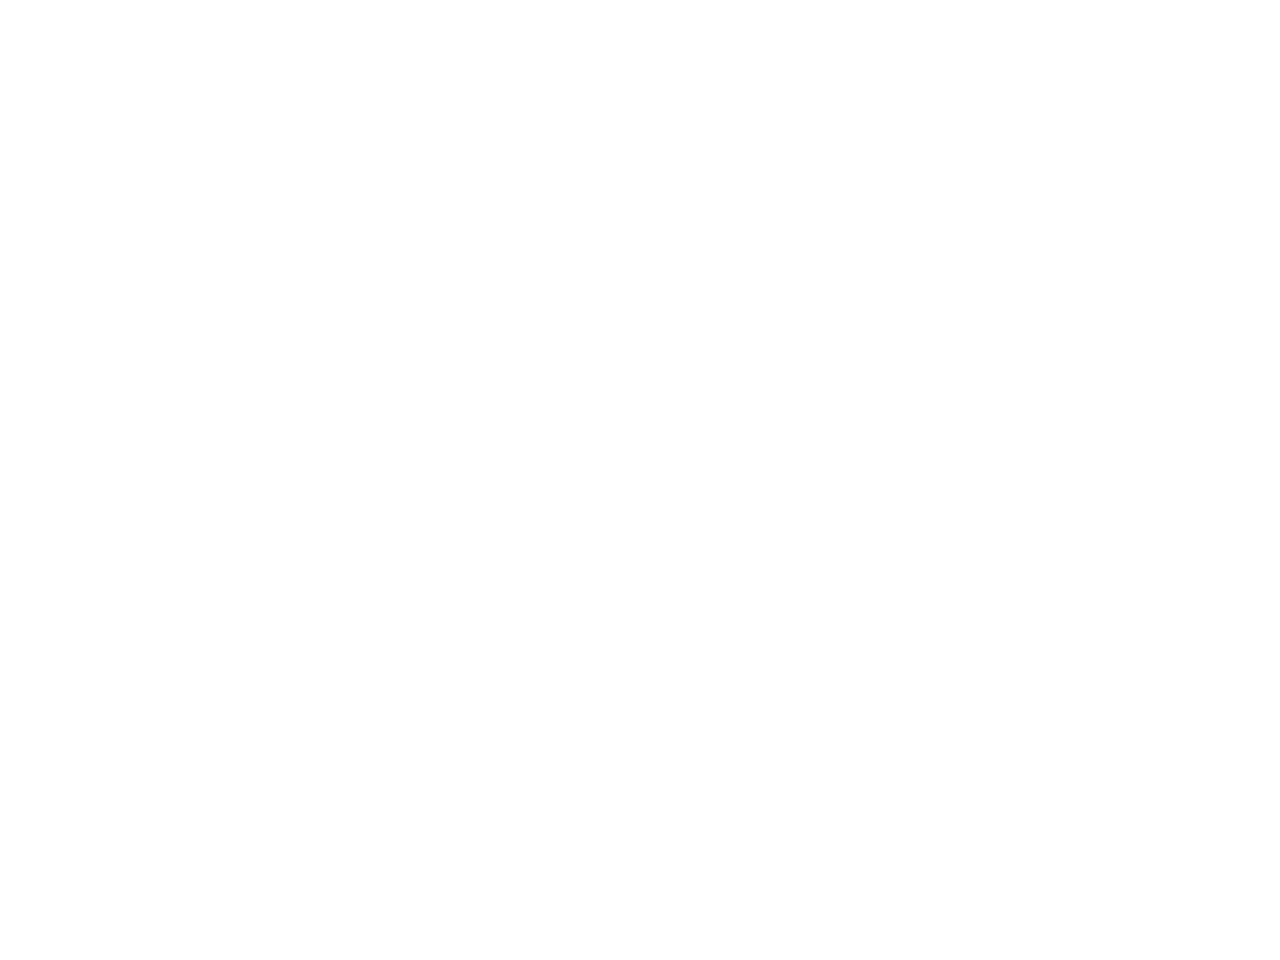

In [29]:
draw_differences(points_B, 1e-12, det_3x3, det_2x2).draw()

#### det_np_3x3 vs det_np_2x2 dla punktów B

<IPython.core.display.Javascript object>


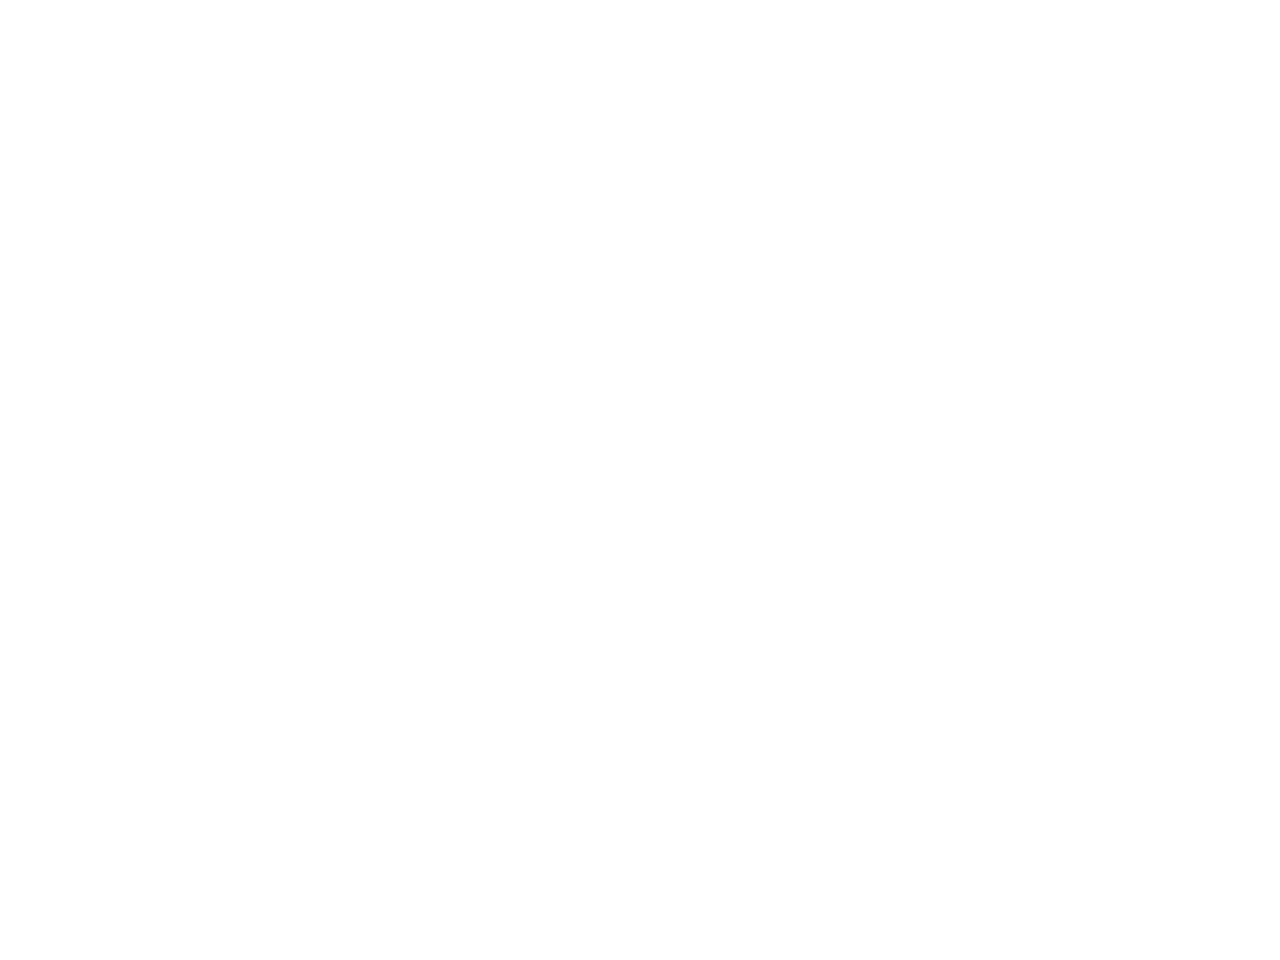

In [30]:
draw_differences(points_B, 1e-12, det_np_3x3, det_np_2x2).draw()

#### det_3x3 vs det_2x2 dla punktów D i epsilon = 1e-12

<IPython.core.display.Javascript object>


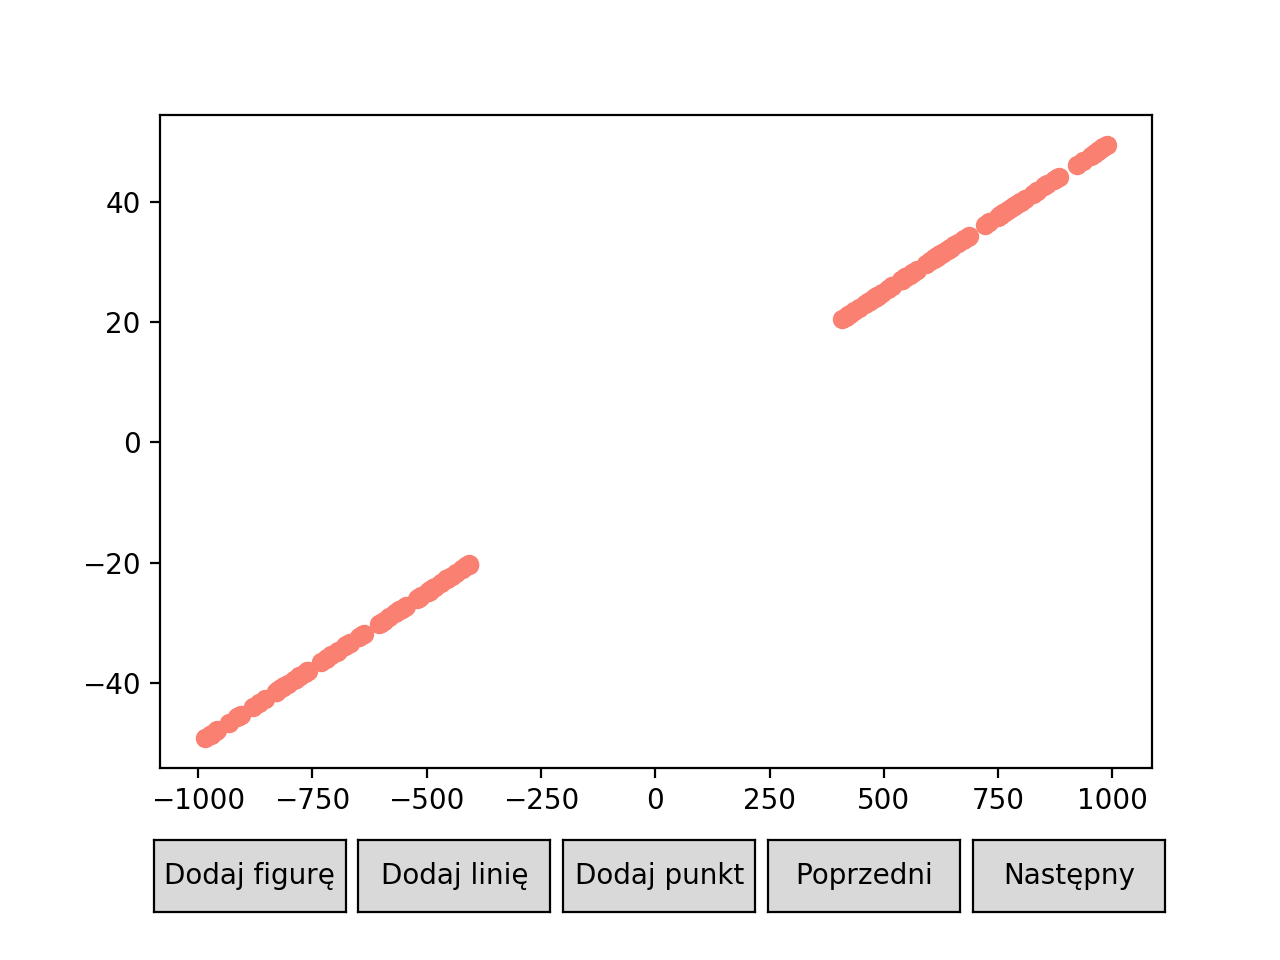

In [31]:
draw_differences(points_D, 1e-12, det_3x3, det_2x2).draw()

© M.Hawryluk, 2020